   ### Titanic- Analizando e cruzando dados
   ### Introdução:
   Nesse projeto, vou mostrar alguns dados e responder algumas perguntas sobre o lendário RMS Titanic, o grande navio Britanico que foi contruido para ser o mais luxuoso e seguro o tornando "inafundável".Sua viagem inaugural foi em 10 de Abril de 1912 e partiu de Southampton (Reino Unido) com destino a Nova York (Estados Unidos), passando por Cherbourg-Octeville (França) e Queenstown na Irlanda. Em 14 de Abril às 23:40 ele colidiu com um iceberg e afundou na madrugada do dia seguinte com mais de 1.500 pessoas a bordo, sendo considerado um dos maiores naufrágios da história.
   
   - Essa base de dados faz parte do Projeto de Conclusão do Curso de Fundamentos de data Science I da Udacity
   
   Aos longo deste projeto, quero lhes mostrar as respostas para algumas perguntas que consegui extrair a partir do Dataset e tambem o detalhamentos das ações do código. Vamos varificar dados sobre os passageiros e sobreviventes.

### Importando bibliotecas

In [44]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

 ##### Importando arquivo csv no pandas

In [45]:
dataset = pd.read_csv('titanic-data-6.csv')

##### Overview dos dados

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Verificação inicial de dados no dataset, podemos perceber não temos todas as informações dos passageiros, temos informações de apenas 891 pessoas, com suas informações divididas em 12 colunas.

##### Verificando as primeiras 5 linhas do dataset

In [47]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Verificando as ultimas 5 linhas do dataset

In [48]:
dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Vemos que em algumas colunas há informação contida com valor "NaN", significa que o campo está nulo, mais abaixo mostrarei como consegui entrar uma solução para isso.

##### Verificando um sample do dataset

In [49]:
dataset.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
175,176,0,3,"Klasen, Mr. Klas Albin",male,18.0,1,1,350404,7.8542,NaN,S


Verificando uma linha aleatória 

##### Detectando se existe valores ausentes

In [50]:
print (dataset.isna().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


##### Verificando valores ausentes

In [51]:
print (dataset.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


##### Aqui exclui uma linha na base de dados que tenha 5 ou mais valores ausentes 

In [52]:
dataset = dataset.dropna(axis = 0, thresh = 5  )

#####  Aqui exclui colunas na base de dados que estejam com mais de 60% de dados ausentes

In [53]:
dataset = dataset.dropna(axis = 1, thresh = 535)

In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


Como resultado dessa primeira limpesa de dados, vemos que a coluna "Cabin" é excluida, e isso não atrapalhará neste analise que faremos aqui

##### Gerando estatísticas descritivas

In [55]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Na coluna "Age" incluiremos nos espaços vazios a média das idades do dataset

In [56]:
dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

##### Verificando a distribuição de dados nos valores da coluna "Embarked", e inclui nos espaços vazios o valor que mais ocorre na coluna

In [57]:
dataset['Embarked'].value_counts()

dataset['Embarked'].fillna('S', inplace = True)

In [58]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Agora os valores "NaN" foram substituidos pela média de idade na coluna "Age" e com os valores que mais ocorre na coluna "Embarked", decidi fazer o complemento desta forma nestas colunas pois acredito que possamos tirar algumas informações importantes que ajudara em nossa analise de dados

##### Aqui criei uma lista para excluir as colunas que não irão agregar a nossa analise de dados 

In [59]:
colunas = ['PassengerId' ,'Ticket', 'Fare']
dataset.drop(colunas, axis = 1, inplace = True)

In [60]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S


##### Criei uma  nova coluna de dados que apresentará o resultado da soma dos valores de "SibSp" e "Parch" para descobrirmos a quantidade de membros da família 

In [61]:
dataset['MembrosFamilia'] = dataset['SibSp'] + dataset['Parch'] + 1

In [62]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,MembrosFamilia
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,1


##### Aqui criei uma nova coluna para identificar quem estava sozinho no navio, fiz um comando para mostrar "0" aos membros com mais de 1 integrante na familia

In [63]:
dataset['Sozinho'] = 1 
dataset['Sozinho'].loc[dataset['MembrosFamilia'] >1] = 0

C:\Users\Henrique\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [64]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,MembrosFamilia,Sozinho
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,2,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,2,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,1,1


##### Criei uma nova coluna "Título" onde irá identificar dentro da coluna "Nome" se Mr,Mrs ou Miss

In [65]:
dataset['Titulo'] = dataset['Name'].str.split(', ',expand = True)[1].str.split('.', expand = True)[0]

In [66]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,MembrosFamilia,Sozinho,Titulo
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,2,0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,2,0,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,1,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,2,0,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,1,1,Mr


#####  Lista de grupos por idade com referência de soma da coluna "Age"

In [67]:
dataset['GrupoIdade'] = 'adulto'
dataset['GrupoIdade'].loc[dataset['Age'] <13] = 'criança'
dataset['GrupoIdade'].loc[(dataset['Age'] >12) & (dataset['Age'] <19)] = 'adolescente'
dataset['GrupoIdade'].loc[dataset['Age'] >59] = 'idoso'

C:\Users\Henrique\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [68]:
dataset.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,MembrosFamilia,Sozinho,Titulo,GrupoIdade
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,2,0,Mr,adulto
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,2,0,Mrs,adulto
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,1,1,Miss,adulto
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,2,0,Mrs,adulto
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,1,1,Mr,adulto


Após feita as exclusões e inclusões, temos um novo dataset mais limpo para proseguir com a analise afim de responder algumas perguntas, vamos continuar a todo vapor...

##### Mostrando graficamente pessoas que embarcaram em locais diferentes

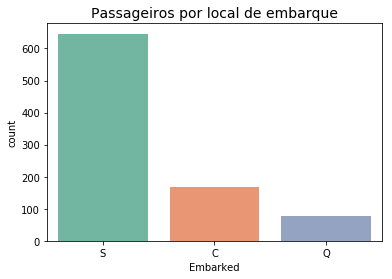

In [69]:
sns.countplot(x='Embarked',data=dataset,palette='Set2')
plt.title("Passageiros por local de embarque",fontsize=14)
plt.show()

Legenda: C = Cherbourg, Q = Queenstown, S = Southampton

Neste gráfico podemos concluir que embarcaram mais pessoas em Southampon

##### Mostrando graficamente pessoas por classe no navio 

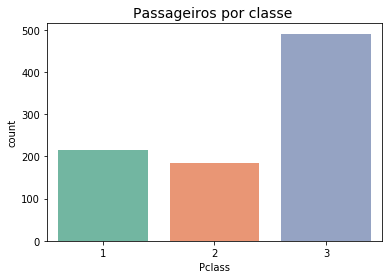

In [70]:
sns.countplot(x='Pclass',data=dataset,palette='Set2')
plt.title("Passageiros por classe ",fontsize=14)
plt.show()

Legenda: 1 = 1° classe, 2 = 2° classe, 3 = 3° classe

Neste gráfico vemos que há mais passageiros na terceira classe

##### Mostrando graficamente quantidade por genero

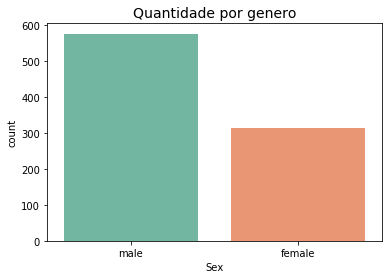

In [71]:
sns.countplot(x='Sex',data=dataset,palette='Set2')
plt.title("Quantidade por genero",fontsize=14)
plt.show()

Legenda: Male= Homem, Female = Mulher

Neste gráfico vemos que há mais homens que mulheres no navio

##### Mostrando graficamente quantidade de pessoas por grupo idade

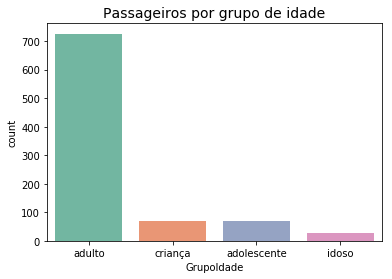

In [72]:
sns.countplot(x='GrupoIdade',data=dataset,palette='Set2')
plt.title("Passageiros por grupo de idade",fontsize=14)
plt.show()

##### Mostrando graficamente pessoas que estavam sozinhas ou acompanhadas

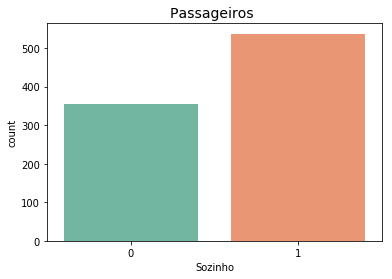

In [73]:
sns.countplot(x='Sozinho',data=dataset,palette='Set2')
plt.title("Passageiros ",fontsize=14)
plt.show()

Legenda: 0 = estava sozinho 1 = estava acompanhado 

Vemos neste gráfico que a maioria dos passageiros estava acompanhado

##### Mostrando graficamente numero de membros da familia

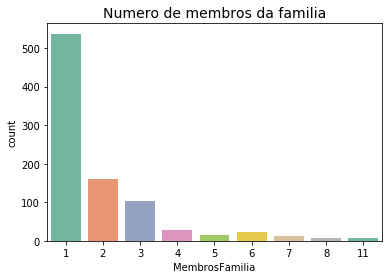

In [74]:
sns.countplot(x='MembrosFamilia',data=dataset,palette='Set2')
plt.title("Numero de membros da familia",fontsize=14)
plt.show()

Esse gráfico mostra quantidade minima a maxima de membros da familia, a quantidade "1" nos mostra que o numero de pessoas com +1 acompanhante (Ex: passageiro + Esposa) era maior

#### Criando uma coluna identificando em qual intervalo de idades cada passageiro está, e um gráfico de distribuição para saber a quantidade de passageiros em cada grupo de idade

Text(0.5,0,'Grupo idade')

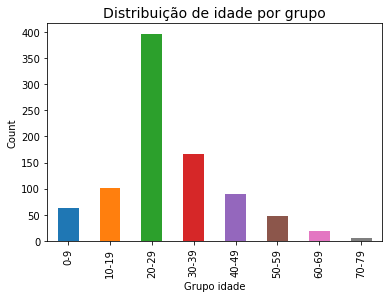

In [75]:
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
dataset['AgeGroup'] = pd.cut(dataset.Age, range(0, 81, 10), right=False, labels=age_labels)

dataset.groupby(['AgeGroup']).size().plot(kind='bar',stacked=True)
plt.title("Distribuição de idade por grupo",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Grupo idade')

 Agora que já conseguimos clarear bastante os dados, podemos responder as perguntas a seguir, você pode acompanhar o gráfico abaixo para rápida vizualização do resultado daquela trágica noite, acompanhe;

##### A Maioria de sobreviventes embarcaram em qual Porto?
 
 - O gráfico abaixo nos mostra que a maioria dos sobreviventes foram os embarcados em Cherbourg

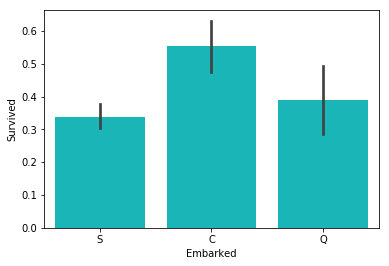

In [76]:
# Mostrando graficamente lista de sobreviventes usando como base a coluna embarked
sns.barplot('Embarked', 'Survived', data=dataset, color="darkturquoise")
plt.show()

##### A maioria dos sobreviventes estavam na primeira, segunta ou terceira classe?
   
- Certamente os passageiros da primeira classe tiveram chances maiores de se salvar, certamente por estarem mais próximo a saida e ter acesso a botes e coletes salva vidas, infelizmente os passageiros da terceira classe não tiverem a mesma "sorte" e encontraram grandes dificuldades


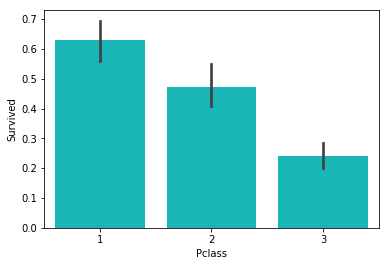

In [77]:
# Mostrando graficamente lista de sobreviventes usando como base a coluna Pclass
sns.barplot('Pclass', 'Survived', data=dataset, color="darkturquoise")
plt.show()

##### A maioria dos sobreviventes eram do sexo masculino ou feminino?
 
- A maioria de sobreviventes foram do sexo feminino. Provavelmente o que proporcionou isso foi o alerta de "mulheres, idosos(as) e crianças primeiro".

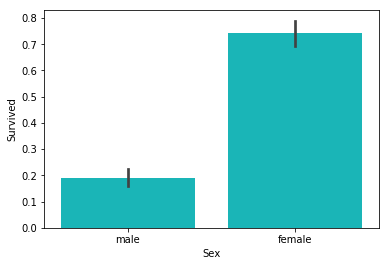

In [78]:
# Mostrando graficamente lista de sobreviventes usando como base a coluna Sex
sns.barplot('Sex', 'Survived', data=dataset, color="darkturquoise")
plt.show()


##### Entre adultos e idosos, quais tiveram mais chances de sobrevivencia?
 
- Crianças tiveram mais chances de sobrevivência, novamente acredito que o alerta de "Mulheres, crianças e idosos primeiro" tenham contribuido para este resultado, fiquei realmente surpreso ao ver este resultado, pois imaginava que a quantidade de adultos (neste dados considerei "adulto" a faixa etária entre 20 e 59 anos) seria maior. Porém imagino que as condições de resistencia física de uma criança (aqui consideramos a faixa etária entre 0 e 12 anos) tenham contribuido para que tenha sido salva
 

##### Os que mais sobreviveram, estavam sozinhos ou acompanhados?
- Os dados nos mostram que as pessoas que estavam sozinhas conseguiram ser salvas em maior numero no desastre

##### Os dados nos mostram que haviam passageiros com mais de 5 integrantes na familia. O que o gráfico de sobrevivencia  nos mostra sobre isso?
- O gráfico nos mostra que os maiores sobreviventes estavam em 4 membros de uma mesma familia. Este gráfico me surpeendeu também, pois imagina-se que, em menor quantidade, as chances de salvar a todos seria maior. Acompanhe o interessante resultado no gráfico abaixo

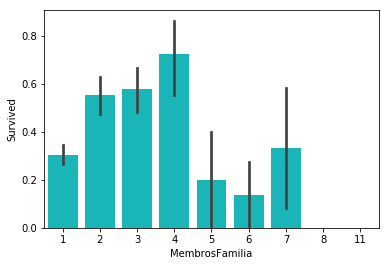

In [79]:
# Mostrando graficamente lista de sobreviventes usando como base a coluna MembrosFamilia
sns.barplot('MembrosFamilia', 'Survived', data=dataset, color="darkturquoise")
plt.show()

##### Qual a faixa etária dos sobreviventes?
- o gráfico abaixo nos mostra um comparativo de idades dos sobreviventes. Vemos que crianças de 0 a 9 anos são as que se destacam no gráfico. Mais uma vez,deve-se aos alerta de prioridade para crianças.

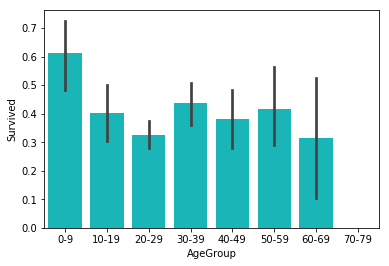

In [80]:
# Mostrando graficamente lista de sobreviventes usando como base a coluna AgeGroup
sns.barplot('AgeGroup', 'Survived', data=dataset, color="darkturquoise")
plt.show()

### Limitações:
 - Nesta analise houveram alguns fatores limitantes para analise de alguns dados, estes estavam em: Age, Cabin e Embarked.

 A Solução para isso foi:
 
   Age: Valores faltantes foram preenchidos com a média de idade desda coluna

   Cabin:   Valores não foram considerados, portanto nada foi alterado

   Embarked: Valores faltantes foram preenchidos com o resultado que mais acontecia naquela coluna

  Feito essas alterações consegui chegar aos resultados presentes neste projeto


### Conclusão
 - Esta analise teve como objetivo identificar um conjunto de pessoas para saber quem teve maior chance de sobrevivência.
 Sabemos que a quantidade de botes era insuficiente em relação a quantidade de passageiros,porém, estava acima da quantidade minima exigida para fazer a viagem. Agora sabemos que, apesar de possuir mais passageiros na terceira classe, os que tiveram mais chances de se salvar foram os da primeira classe. Mesmo os homens estando em maior número no navio, a maior parcela de sobrevivente são mulheres.
 
 Sabemos agora que familia de até 7 membros conseguiu sobreviver. Pessoas de 0 a 69 conseguiram se salvar daquela trágica noite, sendo que um numero de crianças entre 0 e 9 anos se destaram em nossa analise de dados.

 Algumas pesquisas apontam que alguns passageiros da terceira classe não conseguiram chegar ao convés, seja se perdendo em meio aos corredores ou ficando presos atraz de grades que separavam as acomodações. Há também a possibilidade da própria tripulação ter impedido de que as pessoas da terceira classe pudessem ter a chance de se salvar, trancandoas ou colocando barreiras nos caminhos.

 Atravez destas informações podemos ver o impacto deste acidente, que mesmo com o mais de 100 anos do acontacido, ainda nos fascina e assusta.

In [32]:
# Fontes usadas no exercicio;
#Google, Kaggle, Wikipedia